### D207 Performance Assessment
##### OEM2 - OEM2 Task 1: EDA - Exploratory Data Analysis
Exploratory Data Analysis - D207
PRFA - OEM2

#### Imports

 * [Pandas](https://pandas.pydata.org/)
 * [matplotlib](https://matplotlib.org/stable/index.html)
 * [sys](https://docs.python.org/3/library/sys.html)
 * [Seaborn](https://seaborn.pydata.org/)

 * Chi-Square
     * [Chi2 Contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)
     * [Chi2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import chi2_contingency, chi2

### Load Medical Data
Loading `medical_clean.csv`
The data for this performance assessments comes pre-cleaned similar to the output result from D206.

  * Check the datatypes
  * Check for null, na, and empty values
  * Rename Items1-8

In [2]:
medical_clean_data = pd.read_csv('./medical_clean.csv')
#del medical_clean_data[medical_clean_data.columns[0]]

medical_clean_data.info()

missing_values_sum = medical_clean_data.isna().sum()
print(f'Missing Values Check: {missing_values_sum}')

column_renames = {
     'Item1': 'Timely_Admission'
    ,'Item2': 'Timely_Treatment'
    ,'Item3': 'Timely_Visits'
    ,'Item4': 'Reliability'
    ,'Item5': 'Options'
    ,'Item6': 'Hours_Of_Treatment'
    ,'Item7': 'Courteous_Staff'
    ,'Item8': 'Listening' #Evidence of active listening from Doctor
}
medical_clean_data.rename(columns=column_renames, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

### Data Preparation:
#### Convert Variables(Columns) to Categorical DataTypes


In [3]:
category_dtype = 'category'
convert_to_category = {
    'CaseOrder': category_dtype,
    'Customer_id': category_dtype,
    'Interaction': category_dtype,
    'UID': category_dtype,
    'Zip': category_dtype,
    'Lat': category_dtype,
    'Lng': category_dtype,
    'City': category_dtype,
    'State': category_dtype,
    'County': category_dtype,
    'Area': category_dtype,
    'TimeZone': category_dtype,
    'Job': category_dtype,
    'Marital': category_dtype,
    'Gender': category_dtype,
    'ReAdmis': category_dtype,
    'Soft_drink': category_dtype,
    'Initial_admin': category_dtype,
    'HighBlood': category_dtype,
    'Stroke': category_dtype,
    'Complication_risk': category_dtype,
    'Overweight': category_dtype,
    'Arthritis': category_dtype,
    'Diabetes': category_dtype,
    'Hyperlipidemia': category_dtype,
    'BackPain': category_dtype,
    'Anxiety': category_dtype,
    'Allergic_rhinitis': category_dtype,
    'Reflux_esophagitis': category_dtype,
    'Asthma': category_dtype,
    'Services': category_dtype,
    'Timely_Admission': category_dtype,
    'Timely_Treatment': category_dtype,
    'Timely_Visits': category_dtype,
    'Reliability': category_dtype,
    'Options': category_dtype,
    'Hours_Of_Treatment': category_dtype,
    'Courteous_Staff': category_dtype,
    'Listening': category_dtype
}

medical_clean_data = medical_clean_data.astype(convert_to_category)
medical_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CaseOrder           10000 non-null  category
 1   Customer_id         10000 non-null  category
 2   Interaction         10000 non-null  category
 3   UID                 10000 non-null  category
 4   City                10000 non-null  category
 5   State               10000 non-null  category
 6   County              10000 non-null  category
 7   Zip                 10000 non-null  category
 8   Lat                 10000 non-null  category
 9   Lng                 10000 non-null  category
 10  Population          10000 non-null  int64   
 11  Area                10000 non-null  category
 12  TimeZone            10000 non-null  category
 13  Job                 10000 non-null  category
 14  Children            10000 non-null  int64   
 15  Age                 10000 non-null  i

### Data Preparation:
#### Detecting and Removing Categorical Variables with a High Cardinality (>3 - 5 Levels)
If a categorical column has lots of levels (unique categorical values) like UniqueID, Lat or Longitude it should be removed.

In [4]:
categorical_medical_data = medical_clean_data[convert_to_category.keys()]
high_cardinalities = categorical_medical_data.nunique() > 3 #(> 3-5 Levels)
high_cardinalities = high_cardinalities[high_cardinalities == True]
high_cardinalities = list(high_cardinalities.index.values)
print('Categoricals with high cardinality to be removed.')
print(high_cardinalities)

medical_data_prepared = medical_clean_data.drop(high_cardinalities, axis=1)
medical_data_prepared


Categoricals with high cardinality to be removed.
['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Zip', 'Lat', 'Lng', 'City', 'State', 'County', 'TimeZone', 'Job', 'Marital', 'Services', 'Timely_Admission', 'Timely_Treatment', 'Timely_Visits', 'Reliability', 'Options', 'Hours_Of_Treatment', 'Courteous_Staff', 'Listening']


,Population,Area,Children,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,...,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges
0,2951,Suburban,1,53,86575.93,Male,No,19.141466,6,0,...,Yes,No,Yes,Yes,Yes,No,Yes,10.585770,3726.702860,17939.403420
1,11303,Urban,3,51,46805.99,Female,No,18.940352,4,2,...,No,No,No,No,No,Yes,No,15.129562,4193.190458,17612.998120
2,17125,Suburban,3,53,14370.14,Female,No,18.057507,4,1,...,Yes,No,No,No,No,No,No,4.772177,2434.234222,17505.192460
3,2162,Suburban,0,78,39741.49,Male,No,16.576858,4,1,...,No,No,No,No,No,Yes,Yes,1.714879,2127.830423,12993.437350
4,5287,Rural,1,22,1209.56,Female,No,17.439069,5,0,...,No,Yes,No,No,Yes,No,No,1.254807,2113.073274,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4762,Urban,2,25,45967.61,Male,No,16.980860,4,2,...,No,No,No,Yes,No,Yes,No,51.561220,6850.942000,8927.642000
9996,1251,Urban,4,87,14983.02,Male,Yes,18.177020,5,0,...,Yes,No,No,No,No,No,Yes,68.668240,7741.690000,28507.150000
9997,532,Rural,3,45,65917.81,Female,Yes,17.129070,4,2,...,No,No,No,Yes,Yes,No,No,70.154180,8276.481000,15281.210000
9998,271,Rural,3,43,29702.32,Male,Yes,19.910430,5,2,...,No,No,Yes,No,No,No,No,63.356900,7644.483000,7781.678000


#### Section B: Data Analysis
###### Run an Analysis using either, chi-square, t-test, or ANOVA

In [5]:
#Contingency Table
cross_tab = pd.crosstab(medical_data_prepared['Initial_admin']
                       ,medical_data_prepared['ReAdmis'])
                       #,margins=True, margins_name='Total')
cross_tab

ReAdmis,No,Yes
Initial_admin,,
Elective Admission,1608,896
Emergency Admission,3156,1904
Observation Admission,1567,869


In [6]:
#Observed values are Yes and No per Initial_admin.
observed_values = cross_tab.values
print('Observed Values: \n', observed_values)

Observed Values: 
 [[1608  896]
 [3156 1904]
 [1567  869]]


In [7]:
#Chi-square test of independence of variables in a contingency table.
chi_square_statistic, p_value, degree_of_freedom, expected_frequency = chi2_contingency(observed_values)

print(f'Degrees Of Freedom = {degree_of_freedom}')
print(f'Expected Frequency = \n{expected_frequency}')

Degrees Of Freedom = 2
Expected Frequency = 
[[1585.2824  918.7176]
 [3203.486  1856.514 ]
 [1542.2316  893.7684]]


In [8]:
probability = .95
critical_value = chi2.ppf(probability, degree_of_freedom)

print(f'Probability = {probability}, Chi-Square Statistic = {chi_square_statistic}, Critical Value = {critical_value}')

if critical_value <= abs(chi_square_statistic):
    print('Reject Null Hypothesis (H0), variables are dependent.')
else:
    print('Fail to reject Null Hypothesis (H0), variables are independent.')

Probability = 0.95, Chi-Square Statistic = 3.889967990333648, Critical Value = 5.991464547107979
Fail to reject Null Hypothesis (H0), variables are independent.


In [9]:
significance_level_alpha = 1.0 - probability #.05

print(f'Significance = {significance_level_alpha}, Probability = {probability}')

if probability <= significance_level_alpha:
    print('Reject Null Hypothesis (H0), variables are dependent.')
else:
    print('Fail to reject Null Hypothesis (H0), variables are independent.')


Significance = 0.050000000000000044, Probability = 0.95
Fail to reject Null Hypothesis (H0), variables are independent.


#### Section C: Identify the Distribution
###### Univariate Statistics

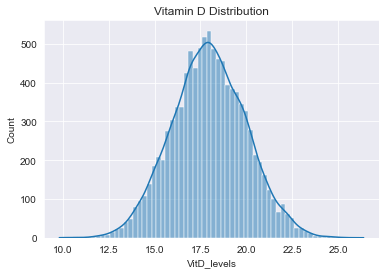

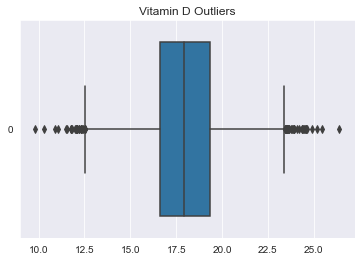

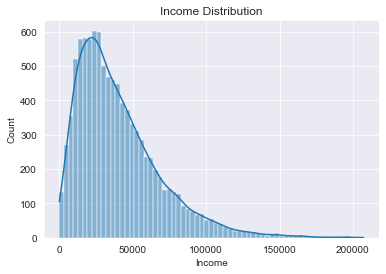

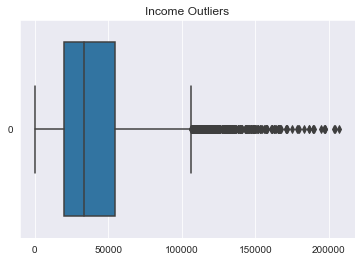

ReAdmis
No     6331
Yes    3669
dtype: int64


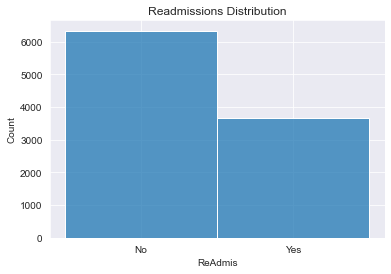

Initial_admin
Elective Admission       2504
Emergency Admission      5060
Observation Admission    2436
dtype: int64


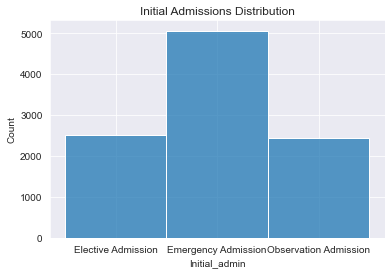

In [10]:
#Historgrams of continuous (VitD_level, Income) and categorical (ReAdmis, Initial_admin) variables

sb.histplot(data=medical_data_prepared['VitD_levels'], kde=True)
plt.title('Vitamin D Distribution')
plt.show()

sb.boxplot(data=medical_data_prepared['VitD_levels'], orient='h')
plt.title('Vitamin D Outliers')
plt.show()

sb.histplot(data=medical_data_prepared['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

sb.boxplot(data=medical_data_prepared['Income'], orient='h')
plt.title('Income Outliers')
plt.show()

readmission_levels = medical_data_prepared.groupby(by='ReAdmis').size()
print(readmission_levels)

sb.histplot(data=medical_data_prepared['ReAdmis'])
plt.title('Readmissions Distribution')
plt.show()

initial_admission_levels = medical_data_prepared.groupby(by='Initial_admin').size()
print(initial_admission_levels)

sb.histplot(data=medical_data_prepared['Initial_admin'])
plt.title('Initial Admissions Distribution')
plt.show()

#### Section D: Identify Distributions
###### Bivariate Statistics

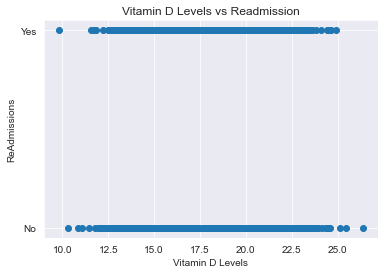

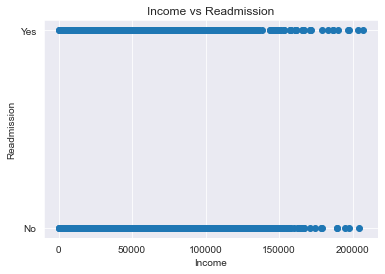

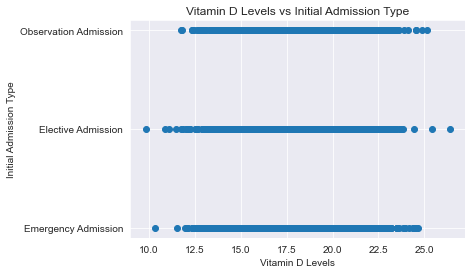

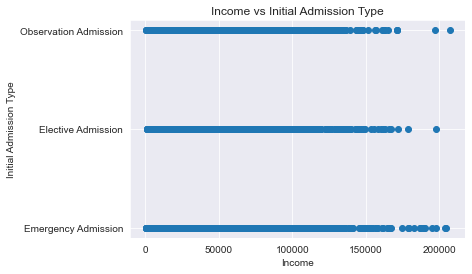

In [11]:
plt.scatter(medical_data_prepared['VitD_levels'], medical_data_prepared['ReAdmis'])
plt.title('Vitamin D Levels vs Readmission')
plt.xlabel('Vitamin D Levels')
plt.ylabel('ReAdmissions')
plt.show()

plt.scatter(medical_data_prepared['Income'], medical_data_prepared['ReAdmis'])
plt.title('Income vs Readmission')
plt.xlabel('Income')
plt.ylabel('Readmission')
plt.show()

plt.scatter(medical_data_prepared['VitD_levels'], medical_data_prepared['Initial_admin'])
plt.title('Vitamin D Levels vs Initial Admission Type')
plt.xlabel('Vitamin D Levels')
plt.ylabel('Initial Admission Type')
plt.show()

plt.scatter(medical_data_prepared['Income'], medical_data_prepared['Initial_admin'])
plt.title('Income vs Initial Admission Type')
plt.xlabel('Income')
plt.ylabel('Initial Admission Type')
plt.show()